<a href="https://colab.research.google.com/github/nehapukale22/Doru-s-World/blob/main/COVID_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns # informative statistical graphics.
import statsmodels.api as sm #for ARIMA and SARIMAX
import datetime
from datetime import timedelta

df = pd.read_csv('/content/covid_19_india.csv')

FileNotFoundError: ignored

In [ ]:
df= df.drop(labels = ["Sno","State","Time","Cured","Deaths"], axis= 1, inplace= False)

In [ ]:
df.head()

,Date,Confirmed
0,30/01/2020,1
1,31/01/2020,1
2,01/02/2020,2
3,02/02/2020,3
4,03/02/2020,3


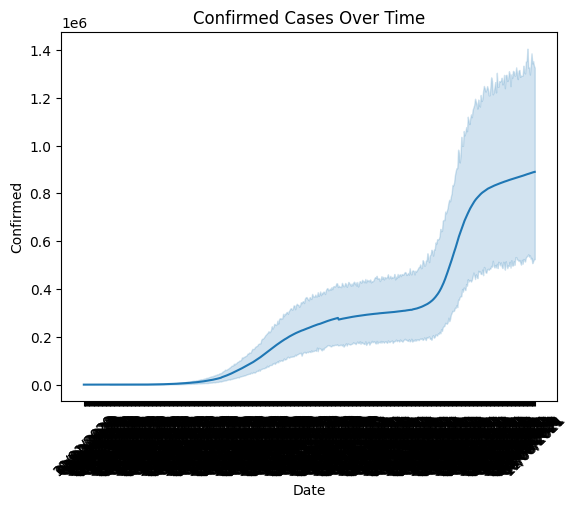

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(x="Date", y="Confirmed",legend = 'full' , data=df)
plt.title("Confirmed Cases Over Time")
plt.xticks(rotation=45)
plt.show()

<ipython-input-5-af2afa873440>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="Date", y="Confirmed",legend = 'full' , data=df, ci=None)


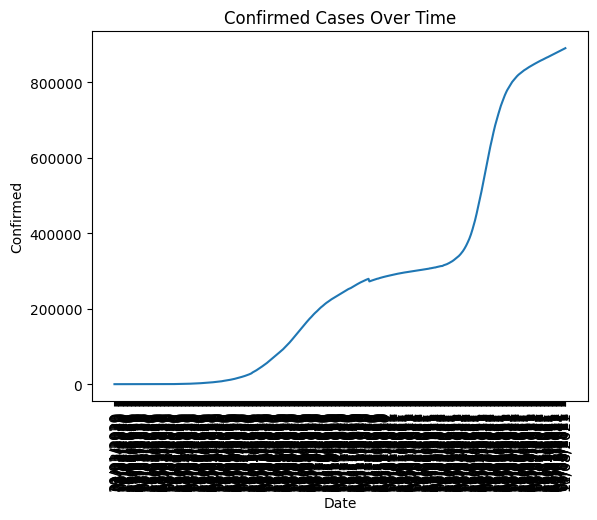

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(x="Date", y="Confirmed",legend = 'full' , data=df, ci=None)
plt.title("Confirmed Cases Over Time")
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [ ]:
df = df.resample('W').sum()

In [ ]:
train_data = df[:int(0.9*(len(df)))]
test_data = df[int(0.9*(len(df))):]

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.arima.ARIMA(train_data, order=(2,1,2))
model_fit = model.fit()

In [ ]:
predictions = model_fit.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, typ='levels')

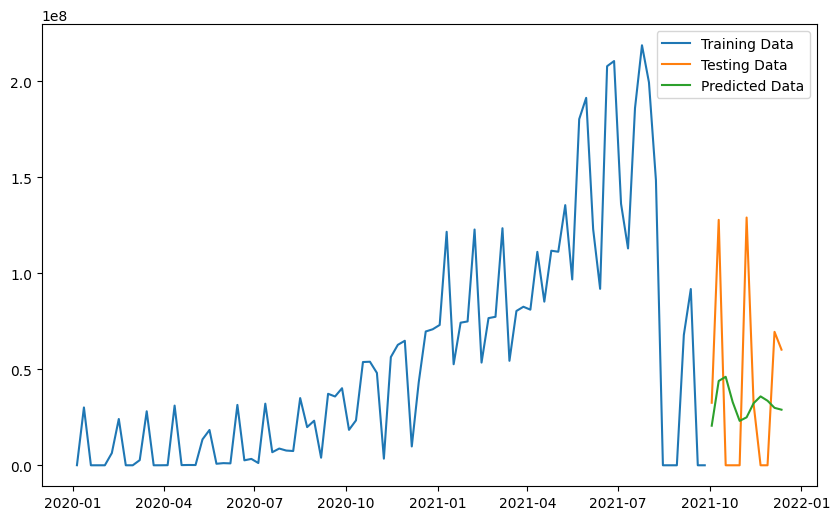

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Testing Data')
plt.plot(predictions, label='Predicted Data')
plt.legend()
plt.show()